Executing models and calculating metrics
----------------------------------------
main - Load Data
Loading DATA....


Data Loaded information:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finish tree_Gini Model



Calculating metrics for model :  Tree_Gini


 Metrics model:  Tree_Gini


Fitting rForest Model


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-19-a24cf1cafdd8>:165: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


Finish rForest Model



Calculating metrics for model :  RForest


 Metrics model:  RForest


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


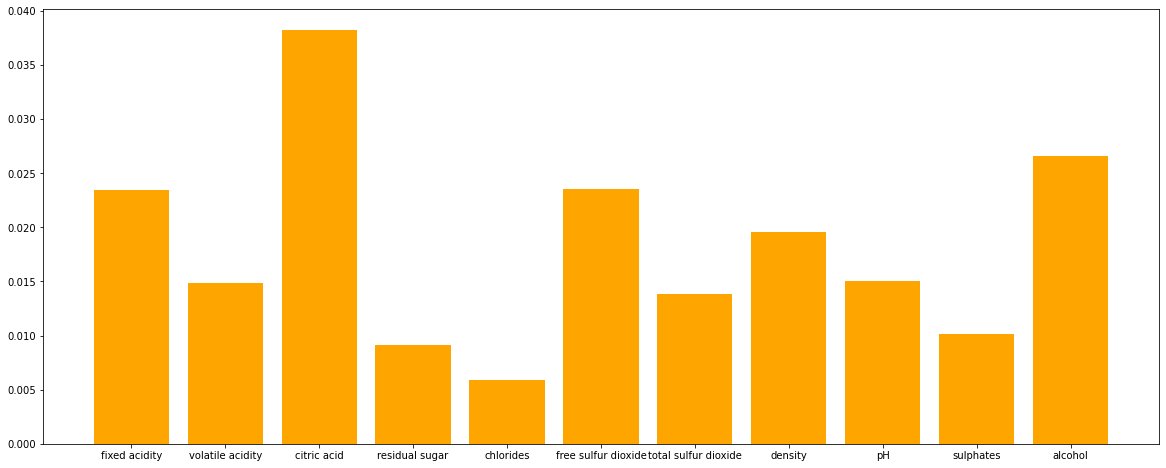

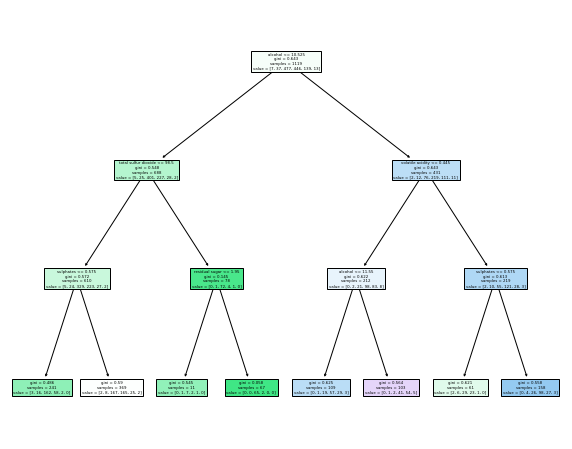

In [19]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn import neighbors, datasets
from sklearn import tree as tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


def load_data():
    
    # 1. Load data
    print("Loading DATA....")
    datar = pd.read_csv("C:/Users/mrica/rvrJupyter/winequality-red2.csv")
    # dataw = pd.read_csv('winequality-white.csv')
    data = datar.copy()
    
    print("\n")
    print("Data Loaded information:")
    print("\n")
    data.info()
    pd.set_option('display.max_rows', None)
    n_data = data.shape[0]

    return data   

  
def split(data, predicteurs, target):
    
    # 2. Select predicteurs / target and split
    print("\n\n")
    print("Predicteurs selection and Split test and train set:")
    print("--------------------------------------------------:")
        
    target_column='quality'
    
    train, test = train_test_split(data, test_size = 0.3, stratify = data['quality'], random_state = 10)

    X_train = train[predictors]
    Y_train = train[[target_column]]

    X_test  = test[predictors]
    Y_test = test[[target_column]]

    
    # 2a. Report about train and test data (Optional)
    print("\n\n")
    print("Info train set:")
    print("--------------")
    X_train.info()
    Y_train.info()
    
    print("\n\n")
    print("Info test set:")
    print("--------------")
    X_test.info()
    Y_test.info()

    # 2b. Report about train and test data (Optional)
    print("\n\n")
    print("Info target set:")
    print("--------------")
    print(Y_train.groupby('quality').size())
    print(Y_test.groupby('quality').size())
    
    return X_train, X_test, Y_train, Y_test 
        

def varianceThresholding(X_train):

    # 3. Identifiez varibles a reenir pour thresholng variance
    print("\n\n")
    print("Predicteurs variance tresholding - Feature Engineering:")
    print("------------------------------------------------------")
    plt.figure(figsize = (20,8))
    scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    selector = VarianceThreshold()
    X_train_tresholding = selector.fit_transform(X_train_normalized)
    plt.bar(x=predictors, height=selector.variances_, color='orange')
    
    print("Predictor variances: \n")
    print(selector.variances_)


def myMetrics(Y_test, y_predicted_test, evalTime, model, dfMetrics):
    
    # 4. METRICS
    print("\n\n")
    print("Calculating metrics for model : ", model)

    accuracy= accuracy_score(y_predicted_test, Y_test)
    precision =  metrics.precision_score(Y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                            sample_weight=None,zero_division='warn')
    recall =  metrics.recall_score(Y_test, y_predicted_test,  average='macro') 
    f1Score = metrics.f1_score(Y_test, y_predicted_test, average='macro')

    dfMetrics[model]['Precision'] = precision.round(3)
    dfMetrics[model]['Accuracy'] = accuracy.round(3)
    dfMetrics[model]['Recall'] = recall.round(3)
    dfMetrics[model]['F1Score'] = f1Score.round(3)
    dfMetrics[model]['FitTime'] = evalTime
    print("\n\n Metrics model: ", model)
    dfMetrics

    return dfMetrics
   
def bayes(X_train, Y_train, X_test, Y_test):
    print("\n")
    print("....Fitting Bayes Model...")

    startTime = time.time()
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    endtime = time.time()
    evalTime = endtime - startTime

    y_predicted_test= gnb.predict(X_test)
    y_predicted_test
    y_predicted_train = gnb.predict(X_train)
    y_predicted_train
    print("Finish Bayes Model...")
    return y_predicted_test, y_predicted_train, evalTime

def tree_Gini(X_train, Y_train, X_test, Y_test):
    print("\n")
    print("...Fitting tree_Gini Model")
    startTime = time.time()

    desicionTree = tree.DecisionTreeClassifier(max_depth =3, criterion='gini', random_state=44, min_samples_leaf=2)
    desicionTree.fit(X_train, Y_train)
    plt.figure(figsize = (10,8))
    plot_tree(desicionTree, feature_names = predictors, filled = True)

    y_predicted_test= desicionTree.predict(X_test)
    y_predicted_train = desicionTree.predict(X_train)
    endtime = time.time()
    evalTime = endtime - startTime
    print("Finish tree_Gini Model")
    return y_predicted_test, y_predicted_train, evalTime

def rForest(X_train, Y_train, X_test, Y_test):
    print("\n")
    print("Fitting rForest Model")
    
    startTime = time.time()
    clf = RandomForestClassifier(n_jobs=6, random_state=42)
    clf.fit(X_train, Y_train)

    endtime = time.time()
    evalTime = endtime - startTime

    y_predicted_test= clf.predict(X_test)
    y_predicted_train = clf.predict(X_train)
    
    print("Finish rForest Model")
    
    return y_predicted_test, y_predicted_train, evalTime
    

if __name__ == '__main__':
    
    print("Executing models and calculating metrics")
    print("----------------------------------------")
    
    predictors =['fixed acidity','volatile acidity', 'citric acid','residual sugar','chlorides',
                  'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
    
    target="quality";
    
    models = ['KNN', 'Tree_Gini', 'Bayes', 'RForest']
    metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1Score', 'FitTime']

    print("main - Load Data")
    data = load_data()
    
    print("main - Split")
    X_train, X_test, Y_train, Y_test  = split(data, predictors, target )
    
    print("main - Thresholding")
    varianceThresholding(X_train)
    
    print("\n\n")
    print("main - Modelisation")
    print("----------------------------------------")
    dfMetrics = pd.DataFrame(index=metrics_labels, columns=models)
        
    y_predicted_test, y_predicted_train, evalTime = bayes(X_train, Y_train, X_test, Y_test)
    dfMetrics = myMetrics(Y_test, y_predicted_test, evalTime, "Bayes", dfMetrics)
    
    y_predicted_test, y_predicted_train, evalTime = tree_Gini(X_train, Y_train, X_test, Y_test)
    dfMetrics = myMetrics(Y_test, y_predicted_test, evalTime, "Tree_Gini", dfMetrics)

    y_predicted_test, y_predicted_train, evalTime = rForest(X_train, Y_train, X_test, Y_test)
    dfMetrics = myMetrics(Y_test, y_predicted_test, evalTime, "RForest", dfMetrics)
    dfMetrics
    
    
    
    
    

In [18]:
dfMetrics

KNN Tree_Gini     Bayes   RForest
Accuracy   NaN     0.535      0.56      0.69
Precision  NaN     0.487     0.563     0.657
Recall     NaN     0.244      0.31     0.364
F1Score    NaN      0.23       0.3     0.368
FitTime    NaN  0.257896  0.006989  0.384151